In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [20]:
url = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(url)


In [21]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Select relevant features for prediction
selected_features = ['primary_fuel', 'capacity_mw']

# Drop rows with missing values in selected features
df = df[selected_features].dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['primary_fuel'] = label_encoder.fit_transform(df['primary_fuel'])


In [23]:
X = df.drop('primary_fuel', axis=1)  # Input features (excluding the target variable)
y = df['primary_fuel']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Train the model
model_primary_fuel = DecisionTreeClassifier()
model_primary_fuel.fit(X_train, y_train)

# Make predictions on the test set
y_pred_primary_fuel = model_primary_fuel.predict(X_test)

# Evaluate the model
accuracy_primary_fuel = accuracy_score(y_test, y_pred_primary_fuel)
print("Accuracy for Primary Fuel Prediction:", accuracy_primary_fuel)


Accuracy for Primary Fuel Prediction: 0.45604395604395603


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset for capacity prediction
X_capacity = df.drop('capacity_mw', axis=1)
y_capacity = df['capacity_mw']

# Split the dataset into training and testing sets
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(
    X_capacity, y_capacity, test_size=0.2, random_state=42)

# Train the model
model_capacity = DecisionTreeRegressor()
model_capacity.fit(X_train_capacity, y_train_capacity)

# Make predictions on the test set
y_pred_capacity = model_capacity.predict(X_test_capacity)

# Evaluate the model
mse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity)
print("Mean Squared Error for Capacity Prediction:", mse_capacity)


Mean Squared Error for Capacity Prediction: 224901.22792269543


  country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN              

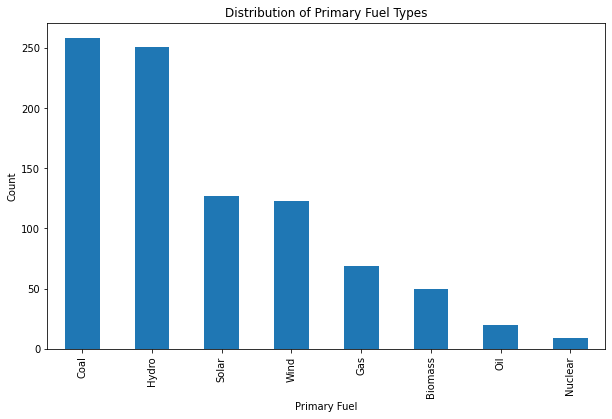

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(url)

# Check the structure and sample records of the dataset
print(df.head())
print(df.info())

# Perform EDA

# Check the distribution of primary fuel types
plt.figure(figsize=(10, 6))
df['primary_fuel'].value_counts().plot(kind='bar')
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.show()

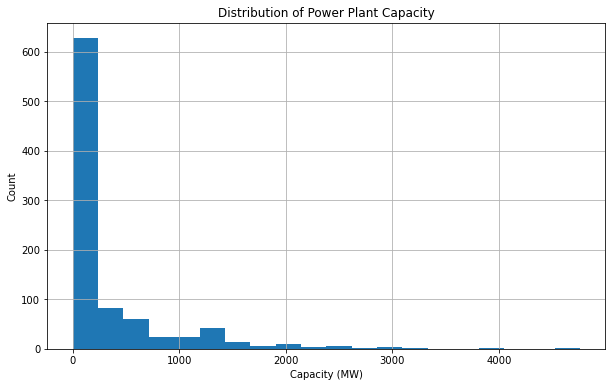

In [27]:

# Analyze the capacity distribution
plt.figure(figsize=(10, 6))
df['capacity_mw'].hist(bins=20)
plt.title('Distribution of Power Plant Capacity')
plt.xlabel('Capacity (MW)')
plt.ylabel('Count')
plt.show()



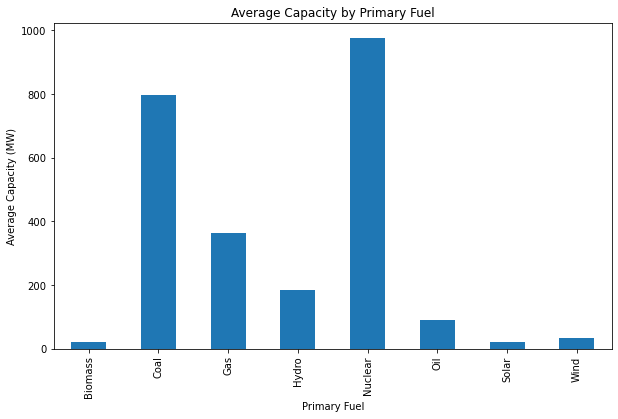

In [28]:
# Explore the relationship between primary fuel and capacity
plt.figure(figsize=(10, 6))
df.groupby('primary_fuel')['capacity_mw'].mean().plot(kind='bar')
plt.title('Average Capacity by Primary Fuel')
plt.xlabel('Primary Fuel')
plt.ylabel('Average Capacity (MW)')
plt.show()


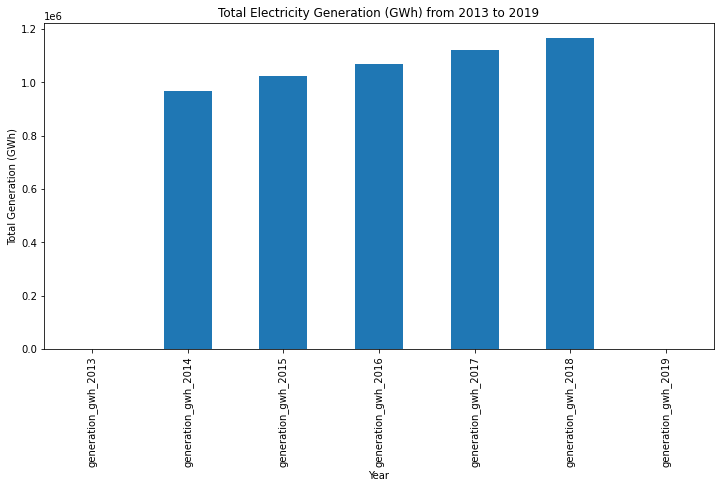

In [29]:

# Analyze the generation data for the years 2013-2019
generation_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                      'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                      'generation_gwh_2019']

plt.figure(figsize=(12, 6))
df[generation_columns].sum().plot(kind='bar')
plt.title('Total Electricity Generation (GWh) from 2013 to 2019')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.show()
